In [2]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib


  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     --------------------------------------- 14.6/14.6 MB 12.8 MB/s eta 0:00:00

  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.2/7.2 MB 8.4 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 2.5/2.5 MB 14.3 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\krist\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
%pip install jupyter-resource-usage

     ---------------------------------------- 46.0/46.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# %conda install metis
# %pip install metis
%conda install -c conda-forge networkx-metis

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [31]:
!pip freeze

appdirs==1.4.4
arcgis==2.0.1
asn1crypto @ file:///tmp/build/80754af9/asn1crypto_1596577642040/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
azure-core @ file:///C:/apps/conda/conda-bld/azure-core_1615482738248/work
azure-storage-blob @ file:///C:/apps/conda/conda-bld/azure-storage-blob_1615483038755/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
black @ file:///C:/apps/conda/conda-bld/black_1647984216741/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
blinker==1.4
Bottleneck @ file:///C:/ci/bottleneck_1648010904582/work
brotlipy==0.7.0
cached-property @ file:///tmp/build/80754af9/cached-property_1600785575025/work
cachetools @ file:///tmp/build/80754af9/cachetools_1619597386817/work
certifi==2021.10.8
cffi @ file:///C:/ci_310/cffi_1642682485096/work
cftime @ file:///C:/apps/conda/conda-bld/cftime_1628801285239/work
chardet @ file:///C:/ci/chardet_1607706937985/work
charset-normalizer @ file:///tmp/build

In [2]:
# The starter code is short and simple, take a look!
from starter import *
import random
import importlib  
#nxMetis = importlib.import_module("networkx-metis")
#import networkx-metis as mt
import nxmetis as mt

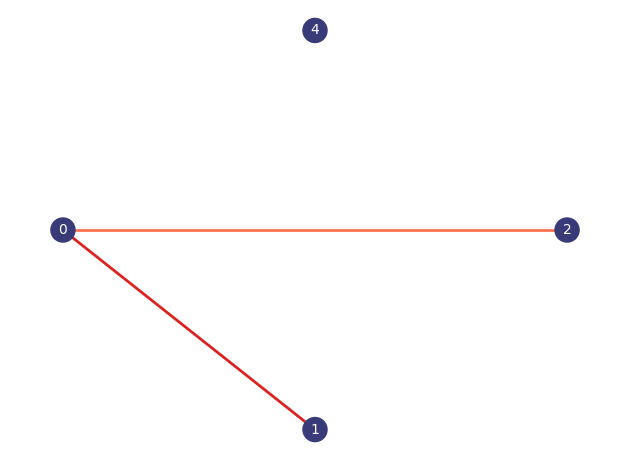

1


In [3]:
G = nx.Graph()
G.add_edge(0, 1, weight = 5)
G.add_edge(0, 2, weight = 3)
G.add_node(4)
visualize(G)
G.nodes[1]['team'] = 1
print(G.nodes[1]['team'])

In [3]:
rando_list = [1, 1, 3, 3, 3, 5, 7]
dicter = {}
for elem in rando_list:
    if elem in dicter:
        dicter[elem] += 1
    else:
        dicter[elem] = 1
        
print(dicter)

{1: 2, 3: 3, 5: 1, 7: 1}


# Phase 1 - Create Inputs

In [4]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # TODO add edges to complete the small input

    #connect one vertex to every other with edge weight 1,000
    for i in range (1, 100):
        G.add_edge(0, i, weight = 1000)

    #grouop A of 10 vertices sharing 45 edges of weight 1,000 inside group 
    for i in range(1, 11):
        for j in range(i + 1, 11):
            G.add_edge(i, j, weight = 1000)

    #group B of 89 vertices sharing edges (11 each) of weight 400 inside group
    for i in range(11, 100):
        for j in range(i + 1, min(i + 12, 100)):
            G.add_edge(i, j, weight = 450)
        
    
    
def medium(G: nx.Graph):
    # Fully connected nodes 0 & 299:
    for i in range (1, 300):
        G.add_edge(0, i, weight=1000)

    for i in range(1, 299):
        G.add_edge(299, i, weight=1000)

    # Cycle 1, 2, 3
    nx.add_cycle(G, [1, 2, 3], weight=100)
    for i in range(4, 296):
        G.add_edge(1, i, weight=1000)
        G.add_edge(2, i, weight=1000)
        G.add_edge(3, i, weight=1000)

    # Cycle 296, 297, 298
    nx.add_cycle(G, [296, 297, 298], weight=1) 
    for i in range(2, 296):
        G.add_edge(296, i, weight=1000)
        G.add_edge(297, i, weight=1000)
        G.add_edge(298, i, weight=1000)

    # Connect both cycles
    G.add_edge(296, 1, weight=1000)
    G.add_edge(297, 1, weight=1000)
    #
    for i in range(4, 25):
        for j in range(4, 155):
            if (i != j):
                G.add_edge(i, j, weight=random.randint(750, 1000))
    for i in range(155, 206):
        for j in range(155, 221):
            if (i != j):
                G.add_edge(i, j, weight=random.randint(300, 750))
    for i in range(206, 277):
        for j in range(206, 277):
            if (i != j):
                G.add_edge(i, j, weight=random.randint(500, 1000))
    for i in range(277, 296):
        for j in range(277, 296):
            if (i != j):
                G.add_edge(i, j, weight=random.randint(250, 750))
    G.add_edge(150, 250 , weight=1000)
    
    
def large(G: nx.Graph):
    # TODO add edges to complete the large input
    
    # 2 vertices connected to 999 other vertices each
    G.add_edge(0, 1, weight = 1000)
    for elem in range(2, 1000):
        G.add_edge(0, elem, weight = 1000)
        G.add_edge(1, elem, weight = 1000)
        
        
    # 100 vertices connected to 30 other vertices each (connected to the same 30 vertices)
    for node in range(2, 102):
        for x in range(102, 132):
            G.add_edge(node, x, weight = 500)
            
            
    count = -1
    # 400 vertices connected to 10 other vertices each (not the same 10 vertices)
    for node in range(132, 532):
        count += 1
        for x in range(532, 542):
            G.add_edge(node, x + count, weight = 100)

In [5]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

AssertionError: File already exists and overwrite set to False. Move file or set overwrite to True to proceed.

# Phase 2 - Implement your Solver

In [4]:
def negate_edges(G: nx.graph):
    # Negates all edges
    for e in G.edges.data():
        G[e[0]][e[1]]['weight'] *= -1
        
    # Adds edges for all disconnected nodes with weight zero     
    for e in nx.non_edges(G):
        G.add_edge(*e, weight=0)
    
    
def solve2(G: nx.Graph):
    curr_score = float('inf')
    G_neg = G.copy()
    negate_edges(G_neg)  
    
    # make graph with no 0 degree nodes
#     remove_list = []
#     degree_list = nx.degree(G)
#     for elem in degree_list:
#         if elem[1] == 0:
#             G.remove_node(elem[0])
#             remove_list.append(elem[0])
    
    
    # run metis partitioning on this graph with 0 nodes
    
    for i in range(1, 5):
        G_copy = G.copy()
        inter_weight, parts = mt.partition(G_neg,i)
        print(parts)
    
    
    
def solve(G: nx.Graph):
    curr_score = float('inf')
    G_neg = G.copy()
    negate_edges(G_neg)  
    
    # make graph with no 0 degree nodes
#     remove_list = []
#     degree_list = nx.degree(G)
#     for elem in degree_list:
#         if elem[1] == 0:
#             G.remove_node(elem[0])
#             remove_list.append(elem[0])
    
    
    # run metis partitioning on this graph with 0 nodes
    
    for i in range(1, G.number_of_nodes()):
        G_copy = G.copy()
        inter_weight, parts = mt.partition(G_neg,i)
        print(parts)
        
        # Set Partitions
#         for v in G.nodes:
#             G_copy.nodes[v]['team'] = parts[v] + 1
            
        counter = 0
        
        for elem in parts:
            counter += 1
            for v in elem:
                G_copy.nodes[v]['team'] = counter
            
        if (score(G_copy) < curr_score):
            curr_score = score(G_copy)
            G = G_copy
        else:
            break
            
    # balance team sizes out if uneven, first create team_dict of team numbers and their team sizes
#     team_dict = {}
#     for node in nx.nodes(G):
#         if G.nodes[node]['team'] in team_dict:
#             team_dict[G.nodes[node]['team']] += 1
#         else:
#             team_dict[G.nodes[node]['team']] = 1
    
    # we have a team_dict that maps each team number to the number of penguins in that team
    
#     for node in remove_list:
#         G.add_node(node)
        
#         move_on = False
        
#         for key1 in team_dict.keys():
#             for key2 in team_dict.keys():
#                 if key1 != key2 and not move_on:
#                     if team_dict[key1] == team_dict[key2]:
#                         continue
#                     elif team_dict[key1] > team_dict[key2]:
#                         G.nodes[node]['team'] = team_dict[key2]
#                         count += 1
#                         move_on = True
#                     else:
#                         G.nodes[node]['team'] = team_dict[key1]
#                         count += 1
#                         move_on = True
                        
#         if G.nodes[node]['team'] is None:
#             G.nodes[node]['team'] = random.choice(team_dict.keys())
                        
            
    
    
    
    # re-add edge weights of 0 to the degree 0 nodes
#     for e in nx.non_edges(G):
#         G.add_edge(*e, weight=0)
    
    print(score(G))

In [5]:
G = read_input('small.in')
solve2(G)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]


Exception: NetworkX-METIS not installed!

In [7]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

: 

: 

In [ ]:
run(solve, 'small.in', 'small.out')

In [ ]:
run_all(solve, 'input', 'output')
tar('output')